
## Business Problem: Predicting Personality Types for Enhanced User Engagement
### Background
In today’s highly personalized digital landscape, businesses and platforms strive to deliver tailored experiences to their users. Understanding a user’s personality can enable companies to improve recommendations, content delivery, and overall engagement. However, traditional personality assessment methods, like the Myers-Briggs Type Indicator (MBTI), require users to answer lengthy questionnaires, which can be time-consuming and inconvenient.

### Problem Statement
The goal is to develop a machine learning model that predicts a person’s MBTI personality type based solely on their written text. This eliminates the need for lengthy questionnaires, providing a seamless, data-driven way to infer personality traits.

### Use Case Scenarios

* Content Recommendation Systems
Platforms like Netflix, YouTube, or Spotify can use personality predictions to recommend content aligned with users' preferences and cognitive styles.
* Targeted Marketing
Businesses can create personalized marketing campaigns that resonate with users’ personality traits, increasing engagement and conversions.
* HR and Recruitment
Companies can use text-based personality analysis to screen candidates, ensuring better cultural fit and team dynamics.
* Mental Health and Well-being Apps
Predicting personality types can help tailor advice, resources, and interactions to support users’ mental health more effectively.

## Objective
Build a machine learning model that predicts the MBTI personality type from text data, enabling businesses to integrate personality-based insights into their operations.

### Key Questions

1. Can personality types be inferred reliably from users' written text?

2. Which language features (e.g., sentiment, word choice, syntax) are most indicative of specific MBTI dimensions (e.g., introversion vs. extroversion)?
3. How accurately can the model predict MBTI types, and what level of confidence is sufficient for real-world applications?

#### Evaluation Metrics

Accuracy: Overall performance of the model in predicting the correct MBTI type.

Precision and Recall: Performance for individual personality dimensions.

F1-Score: A balance between precision and recall.

Confusion Matrix: Insights into misclassifications between similar MBTI types.

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load data
mbti_data = pd.read_csv('Data/reduced_mbti_dataset.csv', )
mbti_data.head(5)


,type,posts
0,INTJ,'There are two Entrepreneurial related shows o...
1,ISFP,"'Dear Associates, thanks for bashing my ISFP-n..."
2,ISFJ,'LOL! Funny. Your ego is hilariously huge. Aga...
3,ENTP,"'Johnnywise, that's what I'm calling you. Don..."
4,INFP,'Too true: The old world will burn in the fir...


In [3]:
#check for missing values
mbti_data.isnull().sum() 


type     0
posts    0
dtype: int64

the are no missing values in this dataset

### Exploratory Data Analysis


<ipython-input-4-ad9ab2642289>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=mbti_data, order=mbti_data['type'].value_counts().index, palette='viridis')


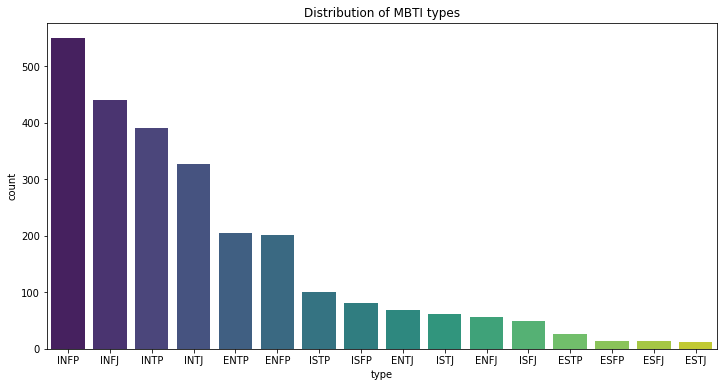

In [4]:
#Analyze the distribution of MBTI types
plt.figure(figsize=(12,6))
sns.countplot(x='type', data=mbti_data, order=mbti_data['type'].value_counts().index, palette='viridis')
plt.title('Distribution of MBTI types')
plt.show()  #The distribution of MBTI types is not balanced. The dataset is biased towards INFP and INFJ types.

In [5]:
#Inspect the text data for length, format, and content quality
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('|||', ' '))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('||', ' '))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('http://', ' '))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('https://', ' '))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('www.', ' '))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('com', ' '))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('org', ' '))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('net', ' '))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('html', ' '))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('pdf', ' '))
mbti_data['post_length'] = mbti_data['posts'].apply(lambda x: len(x.split()))
mbti_data['post_length'].describe()
mbti_data.head(5)


,type,posts,post_length
0,INTJ,'There are two Entrepreneurial related shows o...,1524
1,ISFP,"'Dear Associates, thanks for bashing my ISFP-n...",1446
2,ISFJ,'LOL! Funny. Your ego is hilariously huge. Aga...,1446
3,ENTP,"'Johnnywise, that's what I'm calling you. Don...",1698
4,INFP,'Too true: The old world will burn in the fir...,1087


<ipython-input-6-57b470da25dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='post_length', data=mbti_data, palette='viridis')


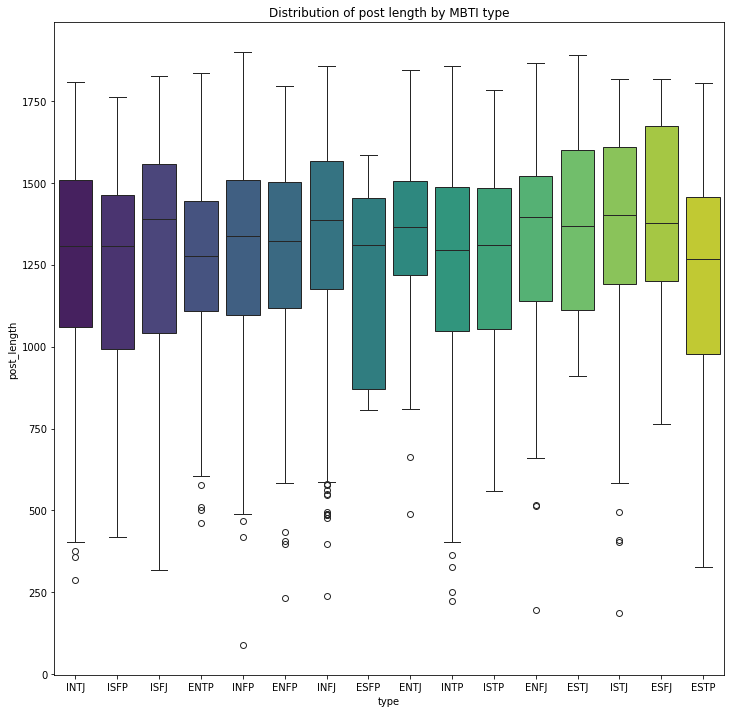

In [6]:
#Visualize relationships between MBTI types and text features.
plt.figure(figsize=(12,12))
sns.boxplot(x='type', y='post_length', data=mbti_data, palette='viridis')
plt.title('Distribution of post length by MBTI type')
plt.show()  #The post length distribution is similar across all MBTI types.


### Data Preprocessing

#### Text Cleaning


In [7]:
#Remove special characters, URLs, and unnecessary whitespace.
import re
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: re.sub(r'\s+', ' ', x))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.strip())
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.lower())
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('http', ''))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('www', ''))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('com', ''))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('org', ''))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('net', ''))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('html', ''))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('pdf', ''))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('jpg', ''))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('png', ''))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('gif', ''))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('jpeg', ''))
mbti_data['posts'] = mbti_data['posts'].apply(lambda x: x.replace('pdf', ''))

mbti_data


,type,posts,post_length
0,INTJ,there are two entrepreneurial related shows on...,1524
1,ISFP,dear associates thanks for bashing my isfpness...,1446
2,ISFJ,lol funny your ego is hilariously huge again w...,1446
3,ENTP,johnnywise thats what im calling you dont get ...,1698
4,INFP,too true the old world will burn in the fires ...,1087
...,...,...,...
2597,INTP,discussions are always worth it but i find thi...,1435
2598,INTP,oh ive been there quite a lot of timesand i be...,1663
2599,INFJ,youtube watchviwf1jidy i have 2003 none of the...,1398
2600,INFP,when youre aware that something is going on bu...,997


In [8]:
#Tokenize text into words or phrases
from nltk.tokenize import word_tokenize
mbti_data['tokens'] = mbti_data['posts'].apply(lambda x: word_tokenize(x))
mbti_data['tokens'][1]



['dear',
 'associates',
 'thanks',
 'for',
 'bashing',
 'my',
 'isfpness',
 'noot',
 'weve',
 'known',
 'eachother',
 'for',
 'several',
 'years',
 'and',
 'now',
 'suddenly',
 'everything',
 'es',
 'out',
 'i',
 'thought',
 'things',
 'were',
 'cool',
 'but',
 'no',
 'all',
 'of',
 'a',
 'sudden',
 'everyone',
 'i',
 'connect',
 'being',
 'manipulative',
 'with',
 'being',
 'selfishtaking',
 'advantage',
 'of',
 'people',
 'for',
 'personal',
 'gain',
 'i',
 'do',
 'not',
 'see',
 'myself',
 'doing',
 'that',
 'my',
 'consience',
 'gets',
 'too',
 'bad',
 'i',
 'find',
 'myself',
 'apologizing',
 'a',
 'lot',
 'instead',
 'yeah',
 'im',
 'very',
 'dis',
 'ainized',
 'but',
 'now',
 'when',
 'i',
 'have',
 'a',
 'steady',
 'in',
 'e',
 'im',
 'trying',
 'to',
 'get',
 'rid',
 'of',
 'stuffbuy',
 'necessary',
 'stuff',
 'be',
 'more',
 'anized',
 'i',
 'feel',
 'like',
 'i',
 'get',
 'so',
 'stuck',
 'in',
 'the',
 'moment',
 'that',
 'i',
 'dont',
 'yes',
 'im',
 'the',
 'same',
 'way'

In [11]:
#removing stopwords 

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
mbti_data['tokens'] = mbti_data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [12]:
#Lemmatize words
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
mbti_data['tokens'] = mbti_data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])



In [13]:
mbti_data['tokens'][1]

['dear',
 'associate',
 'thanks',
 'bashing',
 'isfpness',
 'noot',
 'weve',
 'known',
 'eachother',
 'several',
 'year',
 'suddenly',
 'everything',
 'e',
 'thought',
 'thing',
 'cool',
 'sudden',
 'everyone',
 'connect',
 'manipulative',
 'selfishtaking',
 'advantage',
 'people',
 'personal',
 'gain',
 'see',
 'consience',
 'get',
 'bad',
 'find',
 'apologizing',
 'lot',
 'instead',
 'yeah',
 'im',
 'dis',
 'ainized',
 'steady',
 'e',
 'im',
 'trying',
 'get',
 'rid',
 'stuffbuy',
 'necessary',
 'stuff',
 'anized',
 'feel',
 'like',
 'get',
 'stuck',
 'moment',
 'dont',
 'yes',
 'im',
 'way',
 'pretty',
 'exhausting',
 'draw',
 'btw',
 'nice',
 'work',
 'mentally',
 'unhealthy',
 'people',
 'itd',
 'good',
 'im',
 'somewhat',
 'healthy',
 'consider',
 'feel',
 'calm',
 'younger',
 'unemployed',
 'prone',
 'think',
 'im',
 'acting',
 'cold',
 'uninterested',
 'might',
 'stop',
 'contacting',
 'person',
 'im',
 'interested',
 'might',
 'distance',
 'im',
 'forced',
 'around',
 'person'